In [44]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.metrics import accuracy_score, f1_score
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor


In [4]:
datapath=r"C:\Users\tania\Documents\FormationDataIronhack\final_project\energy+efficiency\ENB2012_data.xlsx" 
data_init=pd.read_excel(datapath)

In [5]:
data_init.shape

(768, 10)

In [6]:
data_init.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

In [7]:
data_init.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
data_init.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [9]:
#checking for null values
data_init.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [10]:
#checking for duplicated rows
data_init.duplicated().sum()

0

In [11]:
#Number of unique values per columns
data_init.nunique()

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    587
Y2    636
dtype: int64

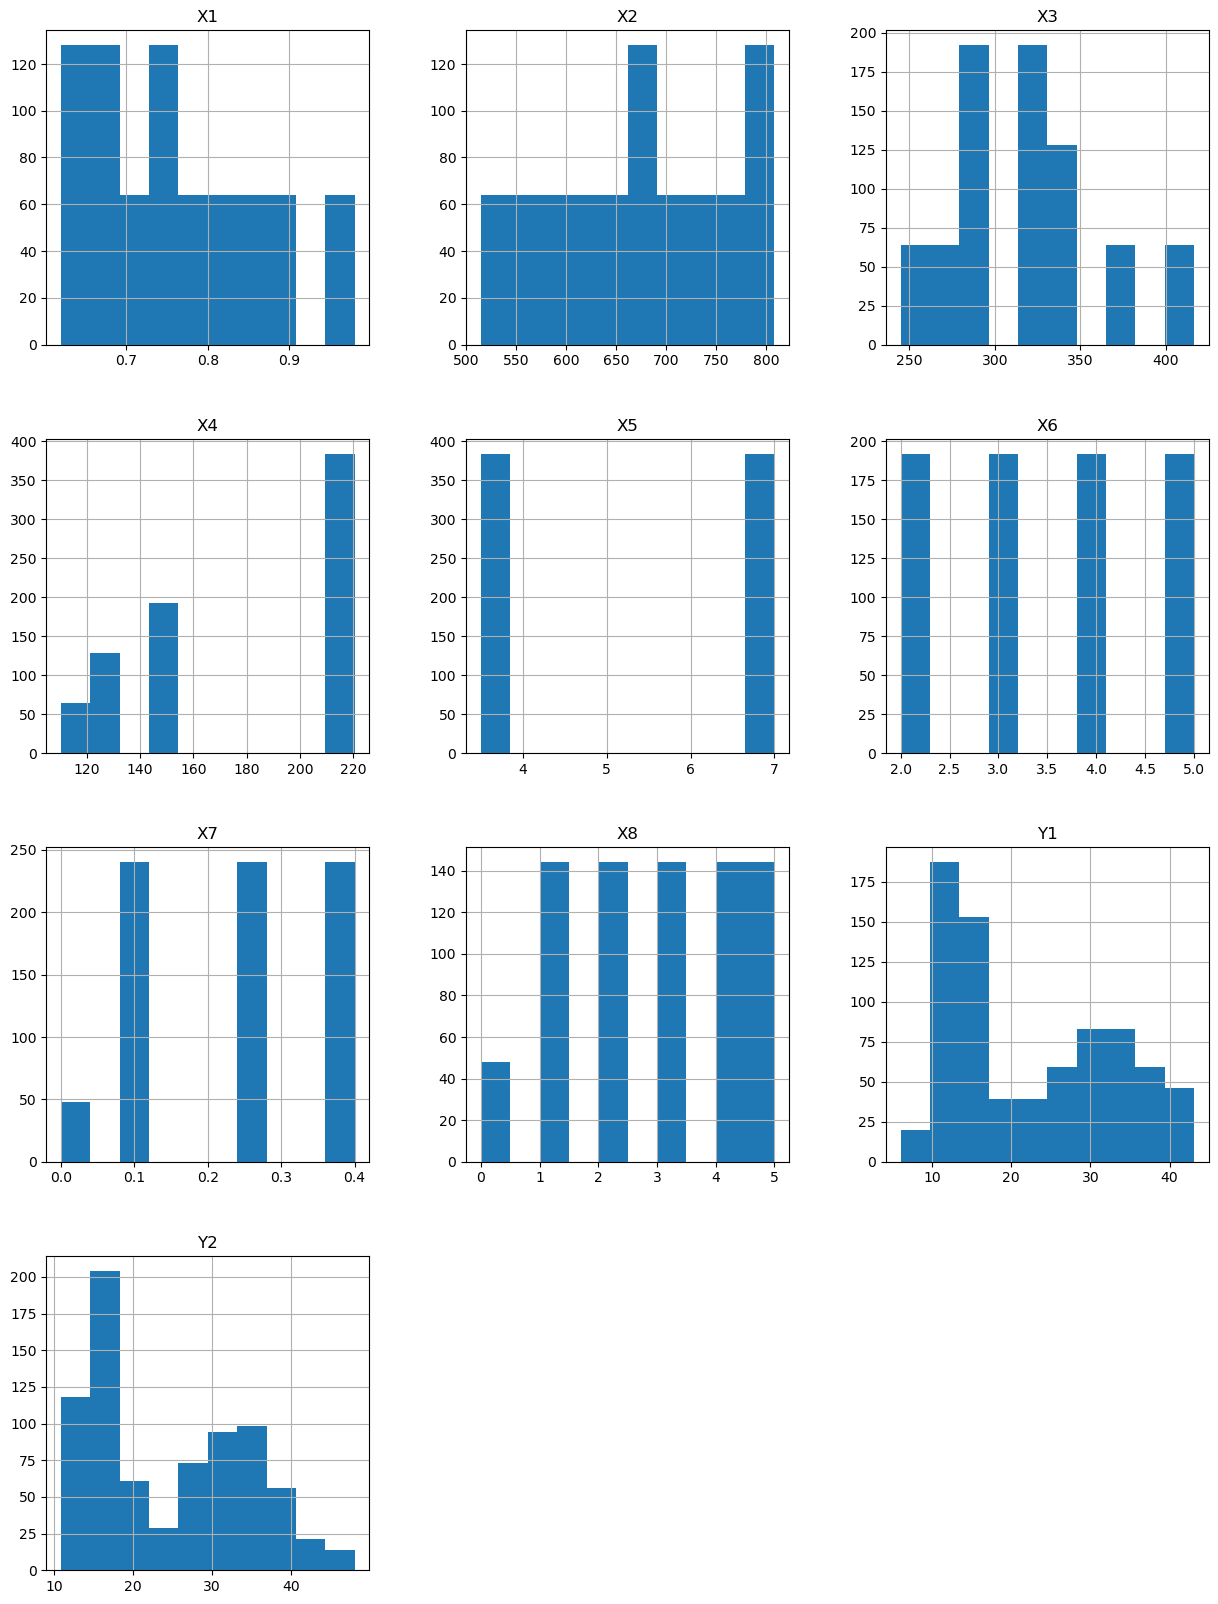

In [12]:
data_init.hist(figsize=(15, 20), xlabelsize=10, ylabelsize=10);

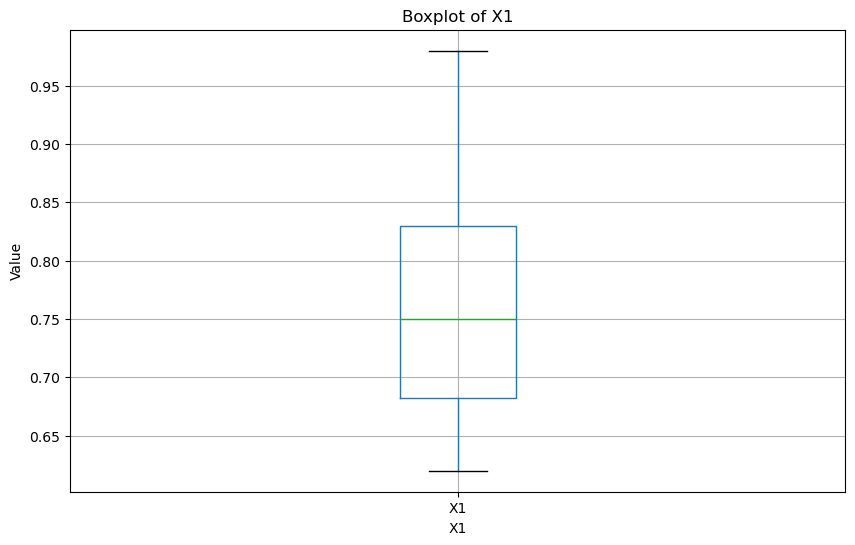

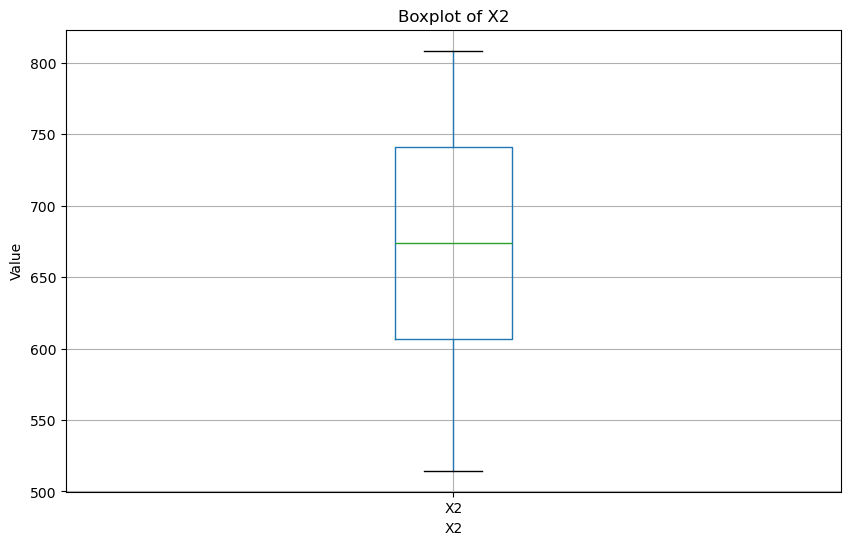

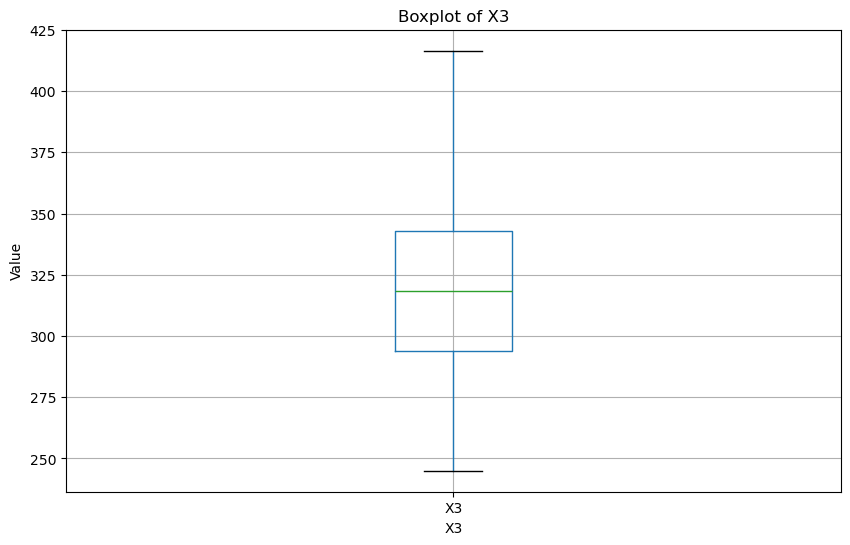

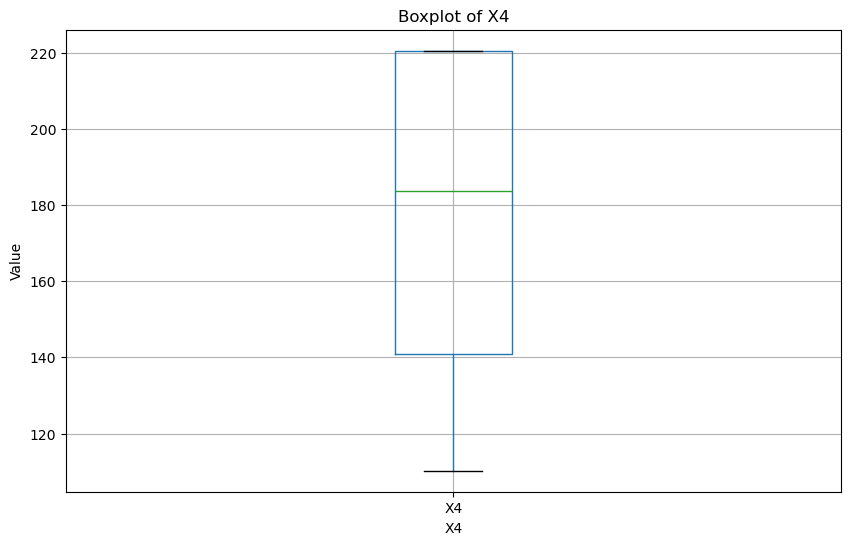

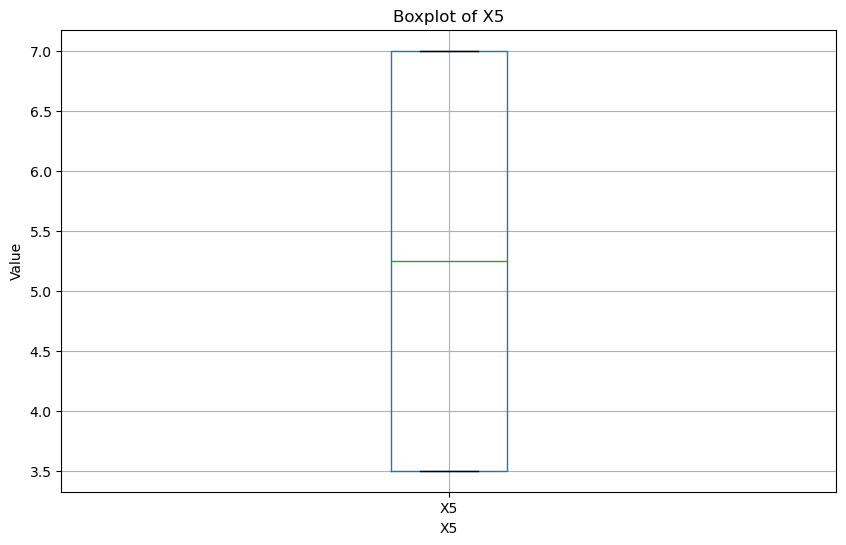

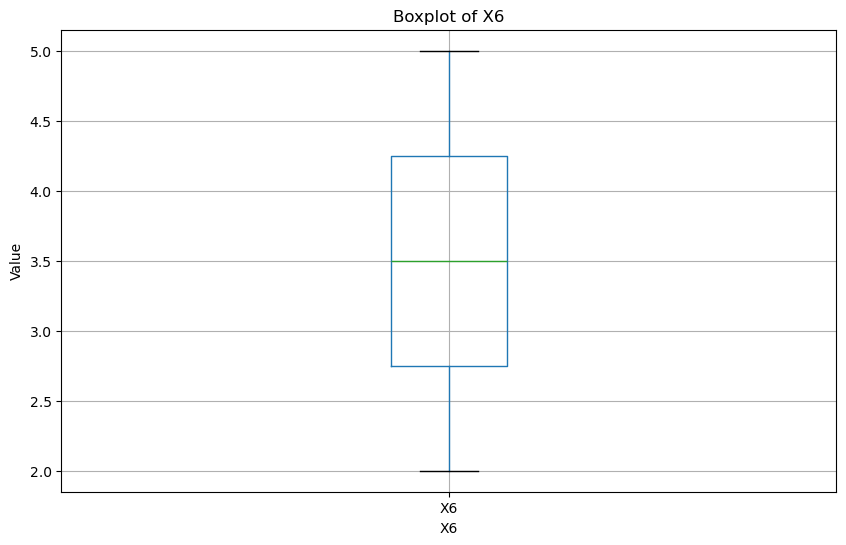

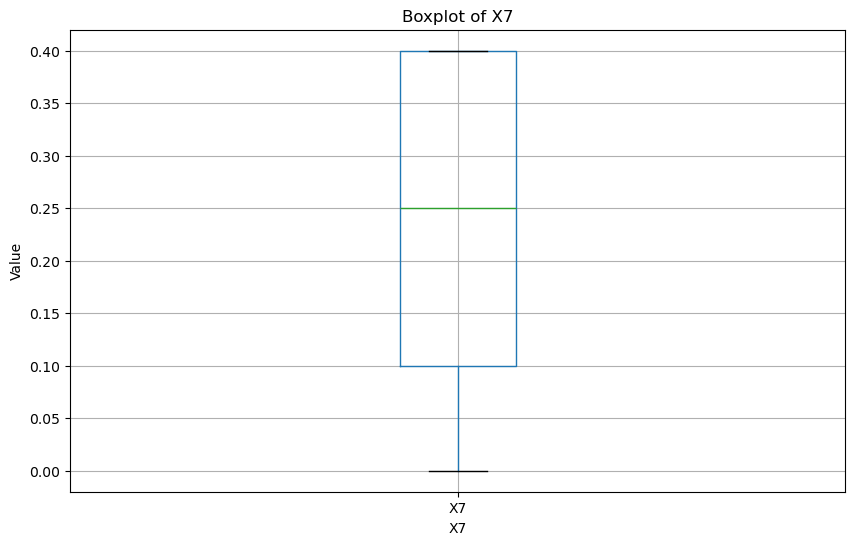

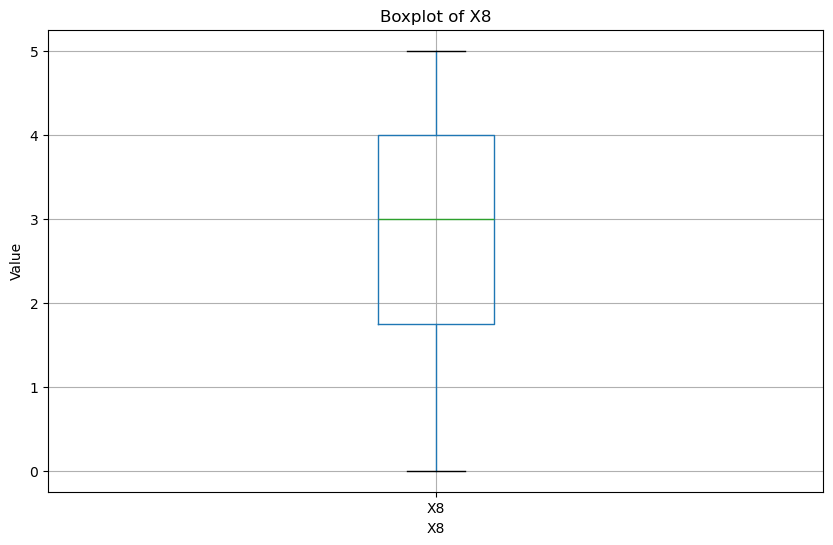

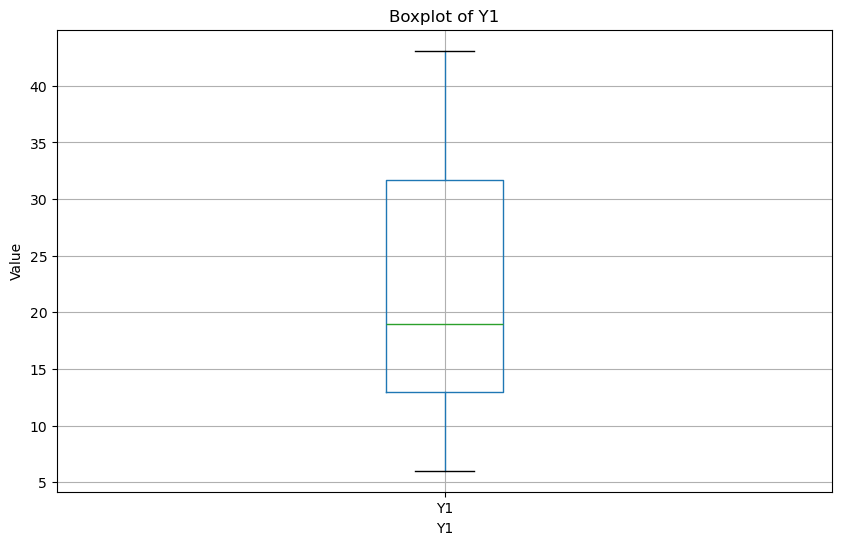

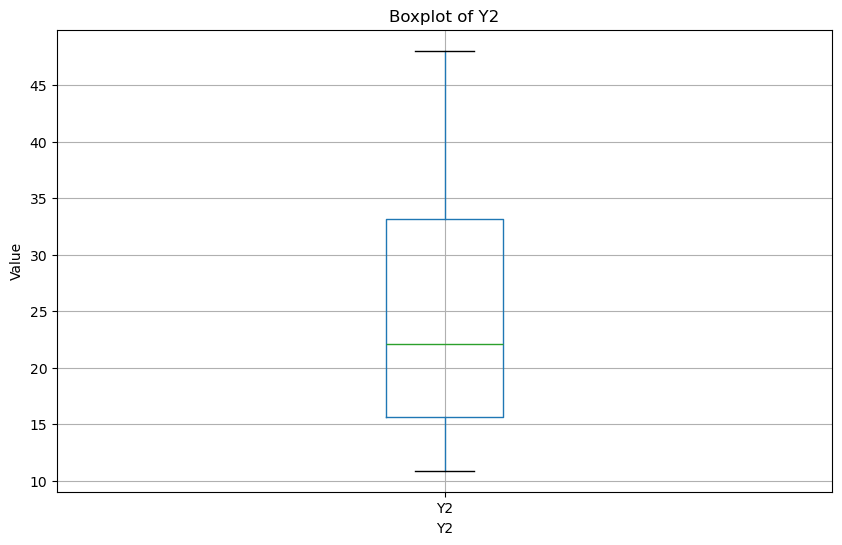

In [13]:
for column in data_init.columns:
    plt.figure(figsize=(10, 6))  # Adjust the size for individual plots
    data_init.boxplot(column=column, fontsize=10)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17  4.492205e-17   
X7 -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15  1.489134e-17   
X8 -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15 -2.920613e-17   
Y1  6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01  8.894305e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

              X6            X7            X8        Y1        Y2  
X1  4.678592e-17 -2.960552e-15 -7.107006e-16  0.622272  0.634339  
X2 -3.459372e-17  3.636925e-1

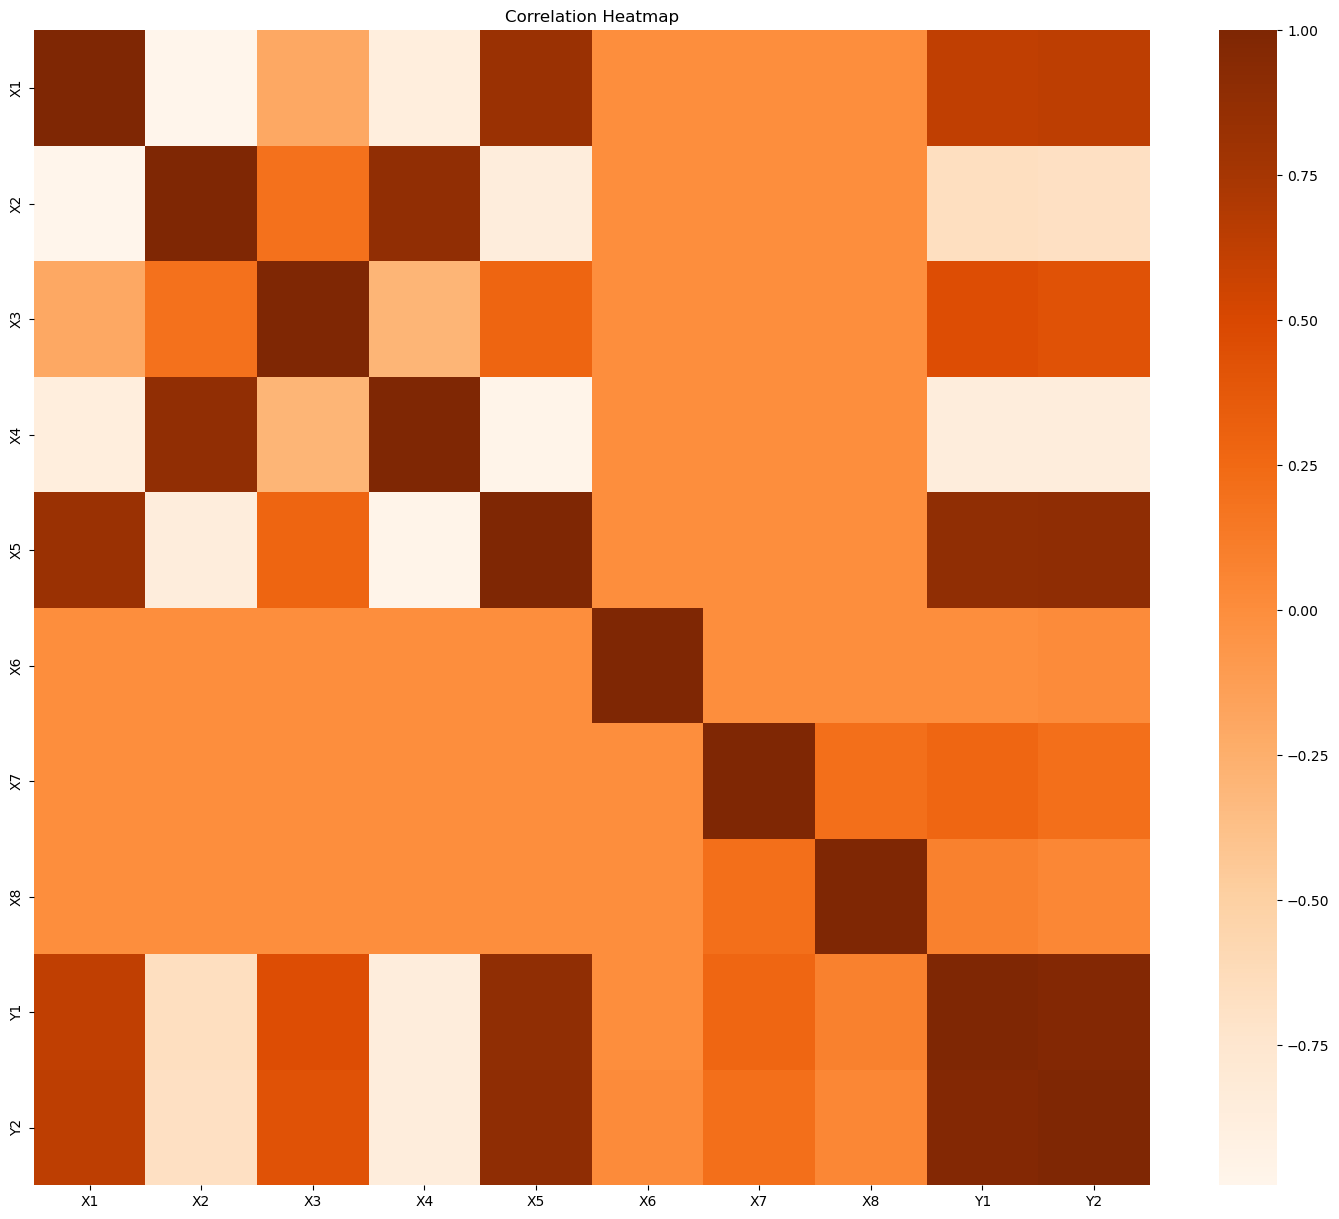

In [27]:
#correlation des features
correlation_matrix = data_init.corr()
print(correlation_matrix)
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=False, cmap="Oranges")

plt.title("Correlation Heatmap")
plt.show()

              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17  4.492205e-17   
X7 -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15  1.489134e-17   
X8 -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15 -2.920613e-17   
Y1  6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01  8.894305e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

              X6            X7            X8        Y1        Y2  
X1  4.678592e-17 -2.960552e-15 -7.107006e-16  0.622272  0.634339  
X2 -3.459372e-17  3.636925e-1

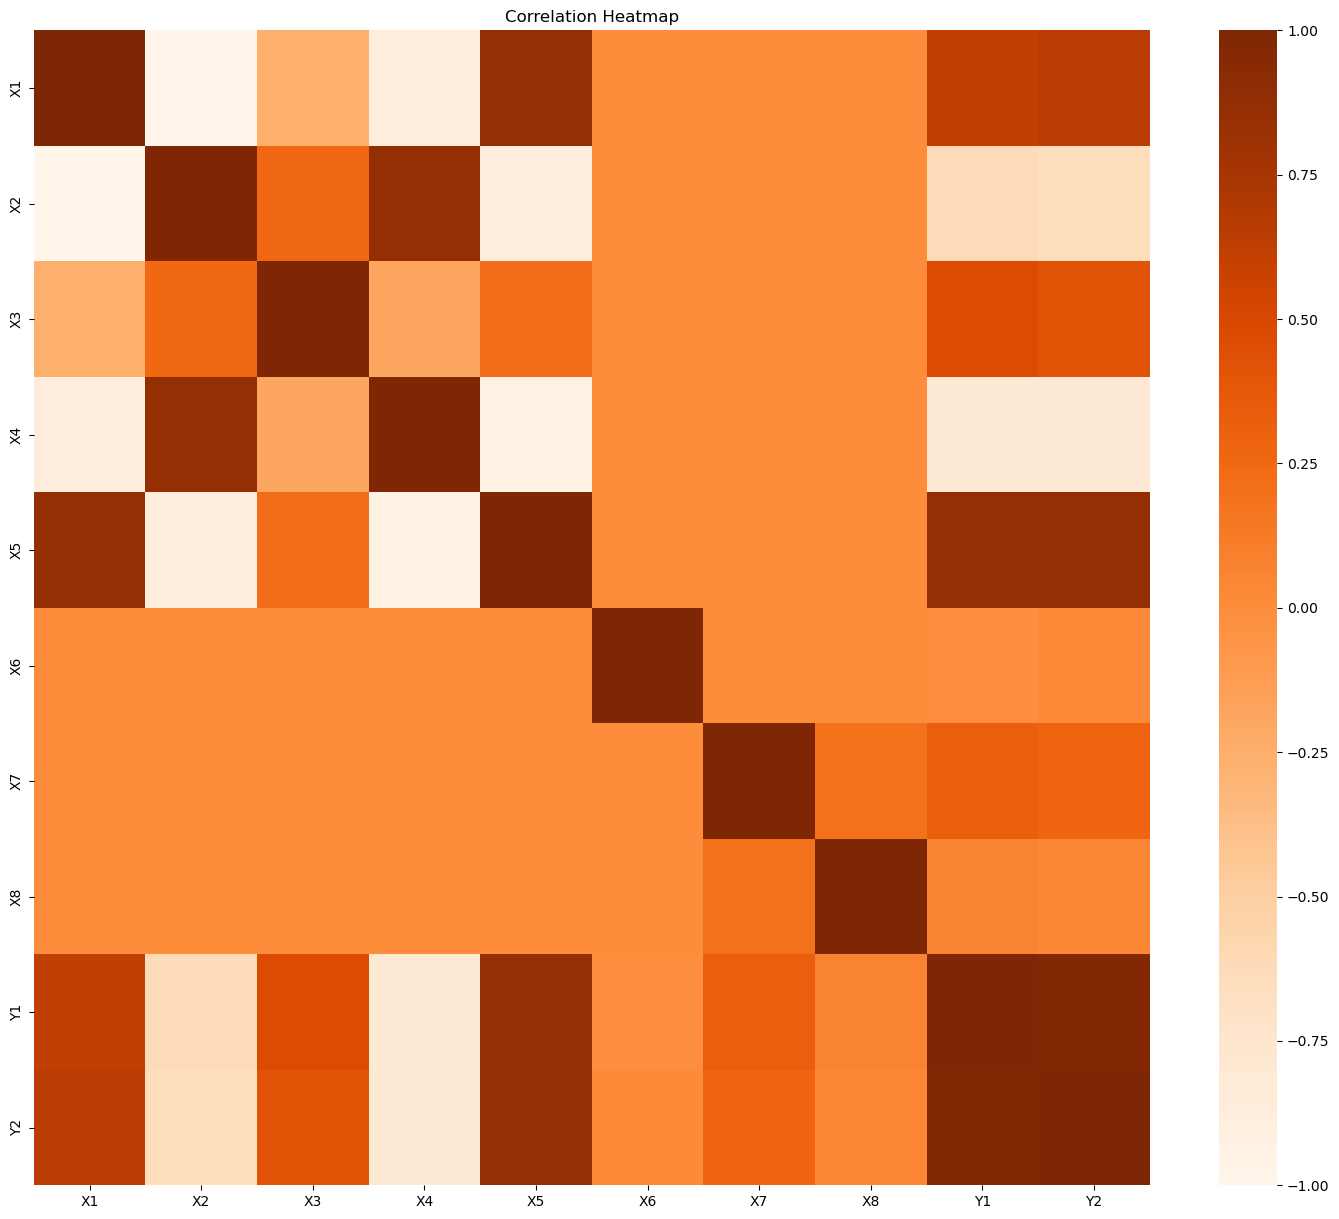

In [28]:
#correlation des features
correlation_matrix_rank = data_init.corr(method='spearman')
print(correlation_matrix)
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix_rank, annot=False, cmap="Oranges")

plt.title("Correlation Heatmap")
plt.show()

In [16]:
#Defining targets and features
features= data_init[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
target1=data_init["Y1"]
target2=data_init["Y2"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, target1, test_size = 0.20, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, target2, test_size = 0.20, random_state=0)

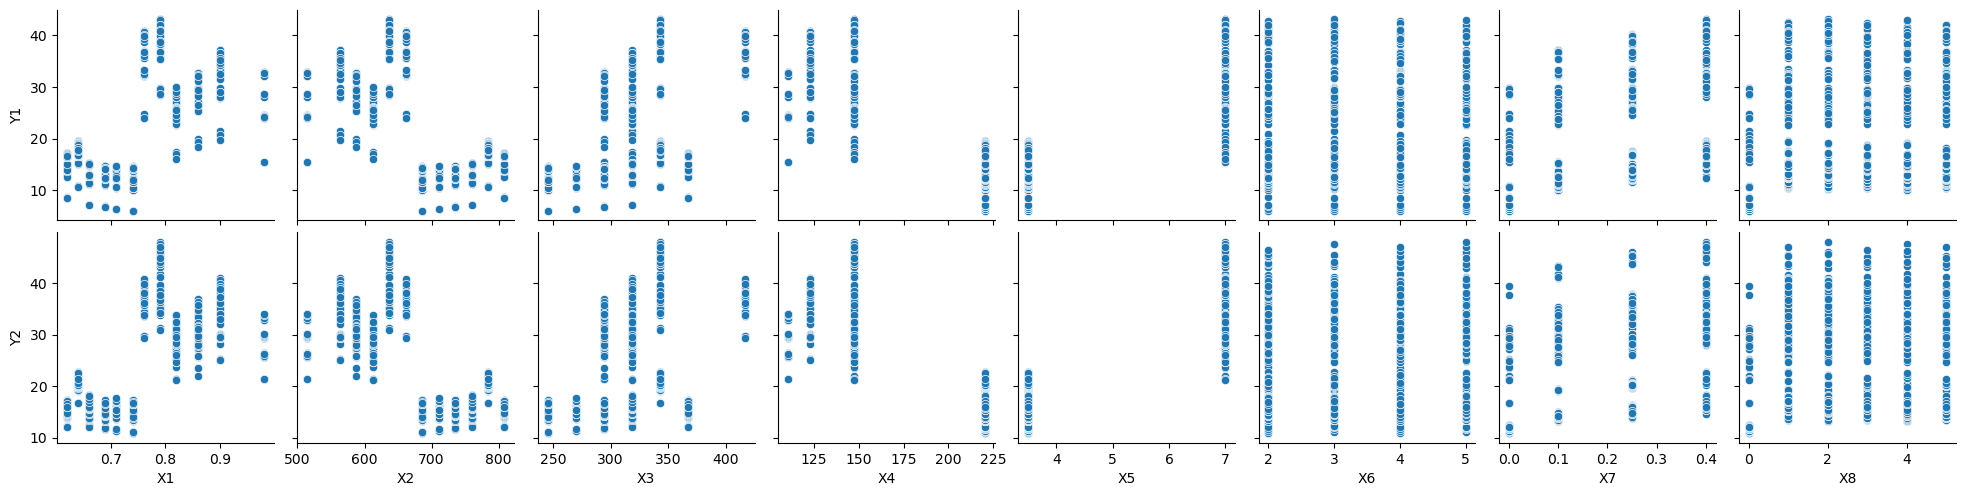

In [20]:
sns.pairplot(data_init, y_vars=["Y1","Y2"], x_vars=features, kind='scatter')

In [ ]:
#checking random_state=0
#X_train1.describe(),X_train2.describe()

In [21]:
#Data transformation => features normalization, fitted on X_train1 as random_state=0 from train_test_split
normalizer = MinMaxScaler()
normalizer.fit(X_train1)

X_train_norm1 = normalizer.transform(X_train1)
X_test_norm1 = normalizer.transform(X_test1)
X_train_norm1 = pd.DataFrame(X_train_norm1, columns=X_train1.columns, index=X_train1.index )
X_test_norm1 = pd.DataFrame(X_test_norm1, columns=X_test1.columns, index=X_test1.index)

 
X_train_norm2 = normalizer.transform(X_train2)
X_test_norm2 = normalizer.transform(X_test2)
X_train_norm2 = pd.DataFrame(X_train_norm2, columns=X_train2.columns, index=X_train2.index )
X_test_norm2= pd.DataFrame(X_test_norm2, columns=X_test2.columns, index=X_test2.index)

In [38]:
#KNN regressor model, as it doesn't depend on normality of data distribution as linear model.
#Prediction of Y1: heating load
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(X_train_norm1, y_train1)

KNeighborsRegressor()

In [42]:
#Résults KNN heating load
predictionsknn1 = knn1.predict(X_test_norm1)
# Compute the evaluation metrics
mae_knn1 = mean_absolute_error(y_test1, predictionsknn1)
mse_knn1 = mean_squared_error(y_test1, predictionsknn1)
rmse_knn1 = np.sqrt(mse_knn1)
r2_knn1 = r2_score(y_test1, predictionsknn1)

# Save the metrics into a dictionary
metrics_knn1 = {
    "Mean Absolute Error KNN1": [mae_knn1],
    "Mean Squared Error KNN1": [mse_knn1],
    "Root Mean Squared Error KNN1": [rmse_knn1],
    "R-squared KNN1": [r2_knn1]
}

# Convert dictionary to DataFrame
metrics_df_knn1 = pd.DataFrame(metrics_knn1)

# Print the DataFrame
print(metrics_df_knn1)

   Mean Absolute Error KNN1  Mean Squared Error KNN1  \
0                  2.025301                 9.345755   

   Root Mean Squared Error KNN1  R-squared KNN1  
0                      3.057083        0.915367  


In [40]:
#KNN regressor model, as it doesn't depend on normality of data distribution as linear model.
#Prediction of Y2: cooling load
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X_train_norm2, y_train2)

KNeighborsRegressor()

In [45]:
#Results KNN cooling load
predictionsknn2 = knn2.predict(X_test_norm2)
# Compute the evaluation metrics
mae_knn2 = mean_absolute_error(y_test1, predictionsknn2)
mse_knn2 = mean_squared_error(y_test1, predictionsknn2)
rmse_knn2 = np.sqrt(mse_knn2)
r2_knn2 = r2_score(y_test2, predictionsknn2)

# Save the metrics into a dictionary
metrics_knn2 = {
    "Mean Absolute Error KNN2": [mae_knn2],
    "Mean Squared Error KNN2": [mse_knn2],
    "Root Mean Squared Error KNN2": [rmse_knn2],
    "R-squared KNN2": [r2_knn2]
}

# Convert dictionary to DataFrame
metrics_df_knn2 = pd.DataFrame(metrics_knn2)

# Print the DataFrame
print(metrics_df_knn2)

   Mean Absolute Error KNN2  Mean Squared Error KNN2  \
0                  3.455545                18.506228   

   Root Mean Squared Error KNN2  R-squared KNN2  
0                      4.301887        0.891359  


In [46]:
#Random forest regressor heating load
forest1 = RandomForestRegressor(n_estimators=100, max_depth=12)
forest1.fit(X_train_norm1, y_train1)

RandomForestRegressor(max_depth=12)

In [50]:
#Results RandomForest cooling load
predictionsRF1 = forest1.predict(X_test_norm1)
# Compute the evaluation metrics
mae_RF1 = mean_absolute_error(y_test1, predictionsRF1)
mse_RF1 = mean_squared_error(y_test1, predictionsRF1)
rmse_RF1 = np.sqrt(mse_RF1)
r2_RF1 = r2_score(y_test1, predictionsRF1)

# Save the metrics into a dictionary
metrics_RF1 = {
    "Mean Absolute Error RF1": [mae_RF1],
    "Mean Squared Error RF1": [mse_RF1],
    "Root Mean Squared Error RF1": [rmse_RF1],
    "R-squared RF1": [r2_RF1]
}

# Convert dictionary to DataFrame
metrics_df_RF1 = pd.DataFrame(metrics_RF1)

# Print the DataFrame
print(metrics_df_RF1)

   Mean Absolute Error RF1  Mean Squared Error RF1  \
0                 0.384126                0.331582   

   Root Mean Squared Error RF1  R-squared RF1  
0                     0.575831       0.996997  


In [47]:
#Random forest regressor cooling load
forest2 = RandomForestRegressor(n_estimators=100, max_depth=12)
forest2.fit(X_train_norm2, y_train2)

RandomForestRegressor(max_depth=12)

In [48]:
#Results RandomForest cooling load
predictionsRF2 = forest2.predict(X_test_norm2)
# Compute the evaluation metrics
mae_RF2 = mean_absolute_error(y_test2, predictionsRF2)
mse_RF2 = mean_squared_error(y_test2, predictionsRF2)
rmse_RF2 = np.sqrt(mse_RF2)
r2_RF2 = r2_score(y_test2, predictionsRF2)

# Save the metrics into a dictionary
metrics_RF2 = {
    "Mean Absolute Error RF2": [mae_RF2],
    "Mean Squared Error RF2": [mse_RF2],
    "Root Mean Squared Error RF2": [rmse_RF2],
    "R-squared RF2": [r2_RF2]
}

# Convert dictionary to DataFrame
metrics_df_RF2 = pd.DataFrame(metrics_RF2)

# Print the DataFrame
print(metrics_df_RF2)

   Mean Absolute Error RF2  Mean Squared Error RF2  \
0                 1.071703                3.263801   

   Root Mean Squared Error RF2  R-squared RF2  
0                     1.806599       0.965299  
